# ccClub-教育平台專案 網路爬蟲



##### Copyright

Licensed under the MIT License

In [ ]:
# MIT License

# Copyright (c) 2020 Lu Jui-Ting

# Permission is hereby granted, free of charge, to any person obtaining a copy
# of this software and associated documentation files (the "Software"), to deal
# in the Software without restriction, including without limitation the rights
# to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
# copies of the Software, and to permit persons to whom the Software is
# furnished to do so, subject to the following conditions:

# The above copyright notice and this permission notice shall be included in all
# copies or substantial portions of the Software.

# THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
# IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
# FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
# AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
# LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
# OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
# SOFTWARE.

## 安裝套件

In [ ]:
import requests
from bs4 import BeautifulSoup
from IPython import display # Some of the output are just too long and too ugly so need this to adjust the display 
!pip install -q gwpy # To omit output, add "%%capture" in the beginning of the cell

     |████████████████████████████████| 1.4MB 6.8MB/s 
     |████████████████████████████████| 51kB 6.5MB/s 
     |████████████████████████████████| 61kB 6.7MB/s 
     |████████████████████████████████| 2.6MB 24.1MB/s 


## 先測試單一課程介面

選定特定課程網頁


觀察網頁程式碼，並找到課程標題

![課程標題](https://i.imgur.com/CESXMSq.png)

嘗試抓取這個頁面的資料

In [ ]:
url = 'https://hahow.in/courses/5d77176845639e00212bc562/main'# example course page
re = requests.get(url)
print(re.text)

<!doctype html><html lang="zh-TW"><head><meta charset="utf-8"><meta name="viewport" content="width=device-width,initial-scale=1"><meta name="p:domain_verify" content="85be3689f02516040edbcaa21c56777c"/><meta name="hahow-version" content="1607922829-d3892c4"/><title>Hahow 好學校 | 最有趣的線上課程平台 | 自學那些學校沒教的事</title><link rel="shortcut icon" href="https://hahow.in/favicon.ico"><link rel="apple-touch-icon" href="https://hahow.in/highres-icon.png"><link rel="apple-touch-icon" href="https://hahow.in/apple-touch-icon.png"><link rel="mask-icon" href="https://hahow.in/website_icon.svg" color="#eb5e00"><link rel="stylesheet" href="https://cdnjs.cloudflare.com/ajax/libs/twitter-bootstrap/3.3.7/css/bootstrap.min.css" integrity="sha512-6MXa8B6uaO18Hid6blRMetEIoPqHf7Ux1tnyIQdpt9qI5OACx7C+O3IVTr98vwGnlcg0LOLa02i9Y1HpVhlfiw==" crossorigin="anonymous"/><link rel="stylesheet" href="https://cdnjs.cloudflare.com/ajax/libs/font-awesome/4.7.0/css/font-awesome.min.css"><script>FontJSON={User:"9579",DomainID:"D0001

Output 沒有那麼容易觀察，這裡可以善用 Beautifulsoup 套件

In [ ]:
soup = BeautifulSoup(re.text, 'html.parser')

display.display(print(soup.prettify())) # Display the output
display.Javascript("google.colab.output.setIframeHeight('100px');") # Adjust the output height

<!DOCTYPE doctype html>
<html lang="zh-TW">
 <head>
  <meta charset="utf-8"/>
  <meta content="width=device-width,initial-scale=1" name="viewport"/>
  <meta content="85be3689f02516040edbcaa21c56777c" name="p:domain_verify">
   <meta content="1607922829-d3892c4" name="hahow-version">
    <title>
     Hahow 好學校 | 最有趣的線上課程平台 | 自學那些學校沒教的事
    </title>
    <link href="https://hahow.in/favicon.ico" rel="shortcut icon"/>
    <link href="https://hahow.in/highres-icon.png" rel="apple-touch-icon"/>
    <link href="https://hahow.in/apple-touch-icon.png" rel="apple-touch-icon"/>
    <link color="#eb5e00" href="https://hahow.in/website_icon.svg" rel="mask-icon"/>
    <link crossorigin="anonymous" href="https://cdnjs.cloudflare.com/ajax/libs/twitter-bootstrap/3.3.7/css/bootstrap.min.css" integrity="sha512-6MXa8B6uaO18Hid6blRMetEIoPqHf7Ux1tnyIQdpt9qI5OACx7C+O3IVTr98vwGnlcg0LOLa02i9Y1HpVhlfiw==" rel="stylesheet">
     <link href="https://cdnjs.cloudflare.com/ajax/libs/font-awesome/4.7.0/css/font-aweso

None

<IPython.core.display.Javascript object>

比較容易觀察了，但也同時發現壞消息： request 爬到的跟我實際上 inspect 到的 html 不一樣。參考了 stackoverflow 的[這個解答](https://stackoverflow.com/questions/58995427/python-requests-get-not-showing-all-html)後，決定用 Selenium 。

此外， Selenium 也有中文[快速入門](https://selenium-python-zh.readthedocs.io/en/latest/getting-started.html#id2)


## 安裝 Selenium 
為了讓 Selenium 的 Web Driver 能在 Google Colaboratory 上正常運作，需要一些前置作業，這裡我參考了 stackoverflow 上的[建議](https://stackoverflow.com/questions/51046454/how-can-we-use-selenium-webdriver-in-colab-research-google-com)

In [ ]:
%%capture 
!pip install selenium
!apt-get update # to update ubuntu to correctly run apt install
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin
import sys
sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')
from selenium import webdriver
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')
wd = webdriver.Chrome('chromedriver',chrome_options=chrome_options)

如果是在一般電腦上操作可以參考以下頁面：
- [Selenium Webdriver API](https://selenium-python.readthedocs.io/api.html)
- [Driver Requirements](https://www.selenium.dev/documentation/en/webdriver/driver_requirements/)


<html data-react-helmet="lang" lang="zh-TW">
 <head>
  <link data-react-helmet="true" href="https://hahow.in/courses/5d77176845639e00212bc562" rel="canonical"/>
  <script async="" src="https://www.google-analytics.com/plugins/ua/ec.js" type="text/javascript">
  </script>
  <script async="" src="https://www.google-analytics.com/analytics.js" type="text/javascript">
  </script>
  <script data-react-helmet="true" type="application/ld+json">
   {"@context":"https://schema.org/","@type":"Product","name":"自學程式如何快速入門 - 以 Python/JS 為例","image":"https://images.api.hahow.in/images/5e01848c1b68d20020e1bdf0","description":"程式自學入門課程，以 Python 和 JavaScript 為例，帶你認識程式基礎，學習如何針對專案需求挑選程式語言。掌握程式學習資源的搜尋辦法，做出你需要的程式應用。","productID":"5d77176845639e00212bc562","offers":{"price":2200,"priceCurrency":"TWD","availability":"InStock"}}
  </script>
  <script data-react-helmet="true" type="application/ld+json">
   {"@context":"http://schema.org","@type":"Course","courseCode":"5d77176845639e00212bc562","image":"https:/
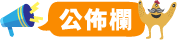
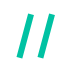
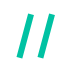
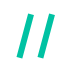
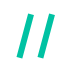
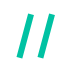
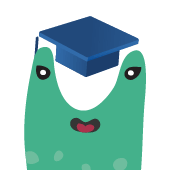

None

<IPython.core.display.Javascript object>

In [ ]:
import time

gettingurl = wd.get(url)
time.sleep(3)
source = wd.page_source
soup = BeautifulSoup(source, 'html.parser')

display.display(print(soup.prettify())) # Display the output of html
display.Javascript("google.colab.output.setIframeHeight('300px');") # Adjust the output height


In [ ]:
# Example
print(soup.title)

<title>自學程式如何快速入門 - 以 Python/JS 為例 - 線上教學課程 - Hahow 好學校</title>


In [ ]:
# Example 2
root = soup.body

root_childs = [e.name for e in root.descendants if e.name is not None]
print(root_childs)

['div', 'div', 'div', 'div', 'div', 'span', 'strong', 'strong', 'div', 'button', 'span', 'span', 'img', 'header', 'div', 'nav', 'div', 'div', 'div', 'li', 'a', 'img', 'li', 'a', 'img', 'span', 'i', 'button', 'span', 'span', 'span', 'span', 'a', 'span', 'span', 'img', 'div', 'div', 'ul', 'li', 'a', 'span', 'i', 'li', 'a', 'span', 'i', 'li', 'a', 'ul', 'a', 'li', 'span', 'span', 'div', 'a', 'span', 'span', 'img', 'div', 'ul', 'div', 'div', 'div', 'img', 'div', 'button', 'div', 'li', 'span', 'div', 'span', 'div', 'a', 'span', 'div', 'div', 'div', 'ul', 'li', 'a', 'main', 'div', 'div', 'div', 'div', 'a', 'span', 'a', 'span', 'a', 'h1', 'div', 'div', 'div', 'div', 'div', 'div', 'div', 'input', 'progress', 'span', 'div', 'div', 'div', 'button', 'svg', 'use', 'span', 'button', 'svg', 'use', 'svg', 'use', 'span', 'span', 'button', 'svg', 'use', 'span', 'div', 'div', 'div', 'button', 'svg', 'use', 'span', 'span', 'button', 'svg', 'use', 'svg', 'use', 'span', 'span', 'div', 'input', 'div', 'butt

**終於**找到原本想爬的標題

In [ ]:
classTitle1 = soup.body.div.div.main.div.div.div.h1

print("Raw output: " + str(classTitle1))
print("Without tag: " + classTitle1.text)

Raw output: <h1 class="title text-center">自學程式如何快速入門 - 以 Python/JS 為例</h1>
Without tag: 自學程式如何快速入門 - 以 Python/JS 為例


另一種爬法，直接找 tag :


In [ ]:
classTitle2 = soup.find('h1',{'class':"title text-center"})
print("Raw output: " + str(classTitle2))
print("Without tag: " + classTitle2.text)

Raw output: <h1 class="title text-center">自學程式如何快速入門 - 以 Python/JS 為例</h1>
Without tag: 自學程式如何快速入門 - 以 Python/JS 為例


知道 tag 的話，不必知道 html 樹狀架構的確切長相也能找到內容

Hahow 的關於課程出現在
```
<div class="sc-1l1teqs-0 iFCjAI">
```

In [ ]:
aboutCourseTitle = soup.find("div",{'class':'sc-1l1teqs-0 iFCjAI'})
aboutCourse = soup.find("pre",{'class':'sc-1l1teqs-2 iOONJS'}).find_all('div')
print(aboutCourseTitle.text)
for tt in aboutCourse:
  print(tt.text)

關於課程
課程時長7 小時 6 分鐘單元數3 章節 29 單元課程總人數471 位同學作業數5 份作業
課程時長7 小時 6 分鐘
單元數3 章節 29 單元
課程總人數471 位同學
作業數5 份作業
沒有期限、不限觀看次數，完成課程還有完課證明！

沒有期限、不限觀看次數，完成課程還有完課證明！


Now, let's try crawling the comments of the course. On the current page, there are three. The technique is the same, just find the **tag** and **class** manually then bs4 could find them.

In [ ]:
comments = soup.find_all('div',{'class':'wei2cc-1 gUylJK marg-b-25'})

for comment in comments:
  print('=================================')
  starRating = comment.find('p',{'class':'marg-b-0'})
  print(starRating.text)

自己本身是在資料科學領域，所以有接觸到可以算得上是程式語言的，只有SAS和R的統計軟體。對於python、JS可以說是完全的新手，但勉強有一點點的程式語言邏輯，基於這樣的背景知識，給予這一門課的評價，合先敘明。
  
就一個新手的角度來說，常常會有很多誤解，包含是不是應該要買書來看？是不是應該要把所有的程式碼都背起來才是學會程式？
甚至到非常技術層面的，選用甚麼樣子的編譯軟體、怎麼選擇程式語言、如何點技能數等等很多問題，而這些書上或是自己學程式的時候可能都會遇到，也會在錯誤的認知下走很多冤枉路，結果繞了一大圈發現自己怎麼還是這麼爛XD
  
而這一堂課不同於以往的程式設計的學習課程，Kai老師會先花一些時間，針對上面的問題做一個答覆，讓想要入門的新手都能夠清楚明白自己的方向，甚至除了這一門課所教授的Python和JS，也能根據前面講的觀念，去選擇自己未來想要點開的技能樹。當然老師非常強調程式學習的脈絡，整門課上完以後就算想要學習其他的語言都能比照一樣的邏輯脈絡往下學習，而且都會輕鬆非常多，也相當有成就感。可以說不只是單純的得到一些魚，還得到了釣魚的方法。
  
雖然是python跟JS，但因為主要的重點是放在介紹程式學習的脈絡與方法，並非專精於單一程式語言的能力強化，所以相較之下在內容跟深度上，如果是對於python跟JS有一定理解，想繼續強化深造的相對來講比較不適合這一門課程。不過，對於已經走了一陣子的冤枉路，想要看看自己的問題出現在哪裡找到突破點的，或是接下來找不到進修方向的人，那這一門課絕對可以給予好的解答。
  
在課程的設計上，因為老師相當重視實作課程，所以會對應安排練習一些程式的作業，也有一些課堂的練習，都是相對來說小小的專案，但是會相當有成就感，至少不會讓新手有一種「我怎麼花了一整天甚麼都寫不出來...」的挫敗感，就算真的卡關非常久，老師也會耐心回答問題，並且有參考答案，就會讓人安心許多。而對於相對來說比較艱澀的術語，也是用一些相當有趣的說法來帶過XD(至於是哪些，就請看課程內容啦XD)，不會讓人聽一聽就想睡或是覺得難以理解。
  
感受得出來老師是一個非常勤於學習的人，而這一點從Kai老師再三強調，要常常練習找網路上的資料、不要畏懼報錯、多輸出多練習等都可以看出一點端倪，其實不只是對於程式學習，在很多事情上面老師的學習態度也是一個非常好的參考指標。


The actual screen only shows 3 comments and there is a **button** that can show more results.
```
<button class="sc-1a6j6ze-0 cYdxxq b21euj-2 gMMXlv">看更多</button>
```
We can **click** on this buttom by providing its **XPATH** to seleniem

In [ ]:
# By running this cell, we enter a "new webpage"
seeMoreButton = wd.find_elements_by_xpath("//button[@class='sc-1a6j6ze-0 cYdxxq b21euj-2 gMMXlv']")[0] # 看更多
seeMoreButton.click()
print(seeMoreButton)

<selenium.webdriver.remote.webelement.WebElement (session="e4608a1e10e76e68aa2e41fd47152e7e", element="ad7dacb8-afb1-4226-b5e6-f18a4fef628b")>


Running the above cell two times (or more) will get error because selenium cannot find the same button on the new page.

In [ ]:
# The previous cell change the page, so we need to parse another source
source2 = wd.page_source
soup2 = BeautifulSoup(source2, 'html.parser')

allComments = soup2.find_all('div',{'class':'wei2cc-1 gUylJK marg-b-25'})
num_comment = 0
for comment in allComments:
  num_comment += 1
  print('=======Comment number "'+str(num_comment)+'"=============================')
  rating = comment.find('div',{'class':'star-ratings'})
  stars = rating.attrs['title']
  time = comment.find('time').text
  shortTitle = comment.find('p',{'class':'text-strong marg-b-5'}).text
  longComment = comment.find('p',{'class':'marg-b-0'}).text
  print(stars, time, shortTitle)
  print(longComment)
  


=======Comment number "1"=============================
5 Stars 2020.04.28 這麼好的給新手的自學課，一定要上一下的！
自己本身是在資料科學領域，所以有接觸到可以算得上是程式語言的，只有SAS和R的統計軟體。對於python、JS可以說是完全的新手，但勉強有一點點的程式語言邏輯，基於這樣的背景知識，給予這一門課的評價，合先敘明。
  
就一個新手的角度來說，常常會有很多誤解，包含是不是應該要買書來看？是不是應該要把所有的程式碼都背起來才是學會程式？
甚至到非常技術層面的，選用甚麼樣子的編譯軟體、怎麼選擇程式語言、如何點技能數等等很多問題，而這些書上或是自己學程式的時候可能都會遇到，也會在錯誤的認知下走很多冤枉路，結果繞了一大圈發現自己怎麼還是這麼爛XD
  
而這一堂課不同於以往的程式設計的學習課程，Kai老師會先花一些時間，針對上面的問題做一個答覆，讓想要入門的新手都能夠清楚明白自己的方向，甚至除了這一門課所教授的Python和JS，也能根據前面講的觀念，去選擇自己未來想要點開的技能樹。當然老師非常強調程式學習的脈絡，整門課上完以後就算想要學習其他的語言都能比照一樣的邏輯脈絡往下學習，而且都會輕鬆非常多，也相當有成就感。可以說不只是單純的得到一些魚，還得到了釣魚的方法。
  
雖然是python跟JS，但因為主要的重點是放在介紹程式學習的脈絡與方法，並非專精於單一程式語言的能力強化，所以相較之下在內容跟深度上，如果是對於python跟JS有一定理解，想繼續強化深造的相對來講比較不適合這一門課程。不過，對於已經走了一陣子的冤枉路，想要看看自己的問題出現在哪裡找到突破點的，或是接下來找不到進修方向的人，那這一門課絕對可以給予好的解答。
  
在課程的設計上，因為老師相當重視實作課程，所以會對應安排練習一些程式的作業，也有一些課堂的練習，都是相對來說小小的專案，但是會相當有成就感，至少不會讓新手有一種「我怎麼花了一整天甚麼都寫不出來...」的挫敗感，就算真的卡關非常久，老師也會耐心回答問題，並且有參考答案，就會讓人安心許多。而對於相對來說比較艱澀的術語，也是用一些相當有趣的說法來帶過XD(至於是哪些，就請看課程內容啦XD)，不會讓人聽一聽就想睡或是覺得難以理解。
  
感受得出來老師是一個非常勤於學習

Voila, now we can paste the informations to anywhere we want.